## Téléchargement des Packages

In [ ]:
# général
import numpy as np
import matplotlib.pyplot as plt

# pour télécharger les données
from google.colab import files
import io

## Exercice 1

Importation

In [ ]:
uploaded = files.upload()

Saving tweets.txt to tweets.txt


In [ ]:
data = np.loadtxt(io.BytesIO(uploaded['tweets.txt']), dtype=str, delimiter=',')

Implementez vos fonctions pour la matrice de corrélation etc..

In [ ]:
#Gérer les données dans une liste "tweets"
tweets = data.tolist()

#Trouver les 10 mots d'au moins 5 caractères de longueur
#Sauvegarder dans une liste
length5_words = []
for tweet in data:
    length5_words.extend([word.lower() for word in tweet.split() if len(word) >= 5])

#Compteur des fréquences de chaque mot d'au moins 5 caractères de longueur
word_counts = {}
for word in length5_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

#Trier en ordre de grandeur
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
most_frequent_word = sorted_word_counts[0][0]
#Vérifier que "iphone" est le mot le plus fréquent en l'affichant
print("Vérification: mot le plus fréquent: ", most_frequent_word)

#Créer un tableau avec les 9 mots les plus fréquents
terms = [term for term, _ in sorted_word_counts[0:10]]

#Mais puisque je veux ignorer "iphone" pour les étapes suivantes,
#je redéfinis la variable terms sans "iphone"
terms = [term for term, _ in sorted_word_counts[1:10]]

#Créer un tableau (188x9) contenant les nombres des mots les plus fréquents pour chaque tweet
term_counts = np.zeros((len(data), len(terms)))
for i, tweet in enumerate(data):
    for j, term in enumerate(terms):
        term_counts[i][j] = tweet.lower().split().count(term)

#Créer la matrice de corrélation (9x9) entre les mots
corr_matrix = np.corrcoef(term_counts, rowvar=False)

#Trouver le mot comportant la corrélation maximale en valeur absolue (excluant le mot lui-même)
corr_max = np.abs(corr_matrix)
#exclure les corrélations entre un mot et lui-même en posant les éléments de la diagonale à 0
np.fill_diagonal(corr_max, 0)
max_corr_words = []
for i, term in enumerate(terms):
    max_corr_word_index = np.argmax(corr_max[i])
    max_corr_word = terms[max_corr_word_index]
    max_corr_words.append([term, max_corr_word])

#Trier en ordre alphabétique
max_corr_words.sort(key=lambda x: x[0])

#Imprimer le tableau (9x2)
print("\n",max_corr_words,"\n")

#Pour plus de clareté pour l'image dans le fichier PDF
#for row in max_corr_words:
#  print(row)


Vérification: mot le plus fréquent:  iphone

 [['broke', 'screen'], ['cracked', 'screen'], ['dropped', 'cracked'], ['happy', 'screen'], ['night', 'cracked'], ['phone', 'night'], ['really', 'cracked'], ['screen', 'cracked'], ['update', 'screen']] 



## Exercice 2

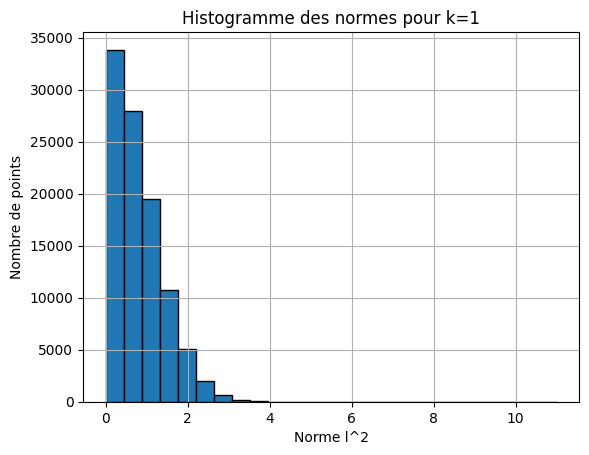

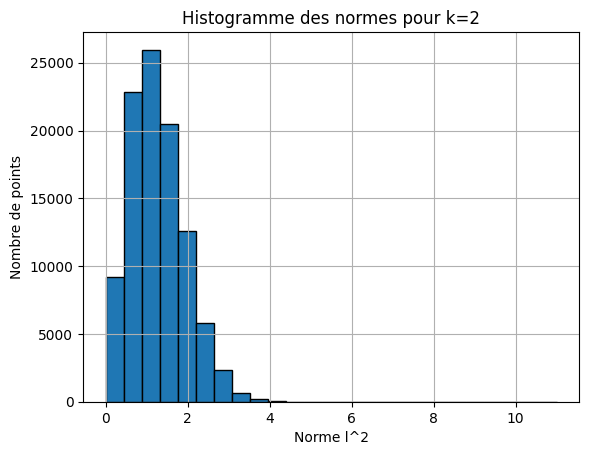

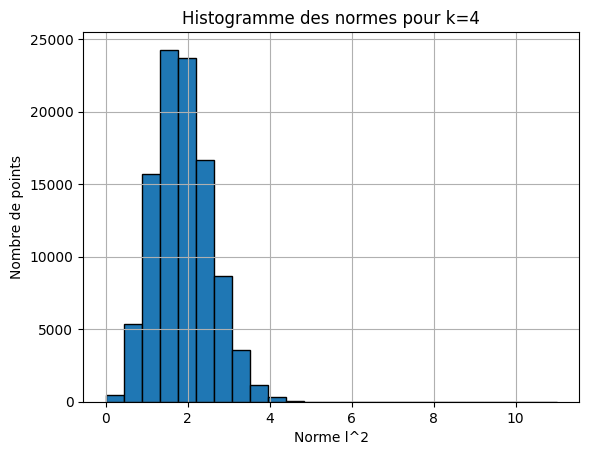

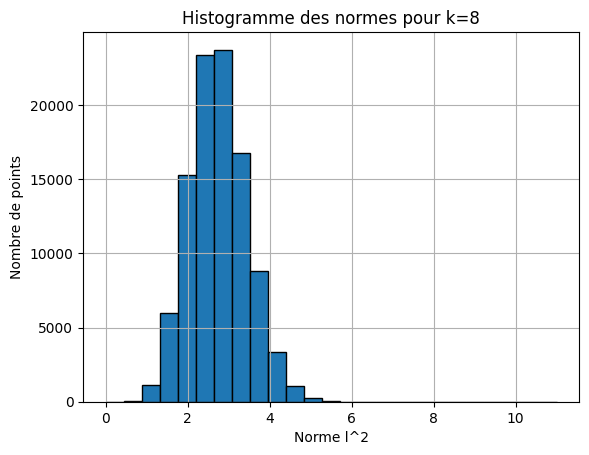

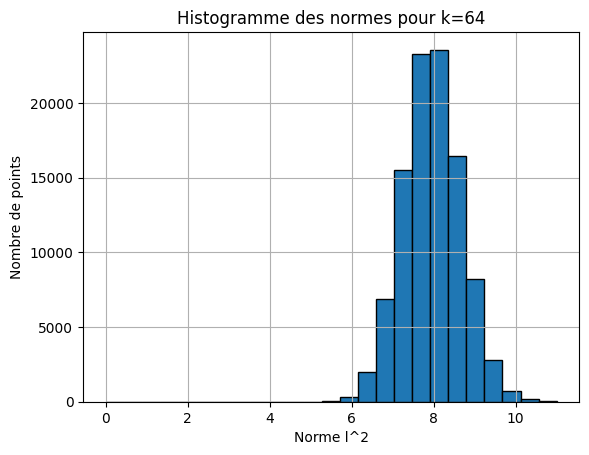

In [ ]:
#Valeurs des dimensions k à tester
dimensions = [1, 2, 4, 8, 64]

#Étapes pour les différents k
#Comme on effectue les mêmes étapes, on va faire un for loop
for k in dimensions:
    #Générer 10^5 points suivant la loi N^k(x|0,Id) avec mu=0 et sigma=Id
    points = np.random.multivariate_normal(mean=np.zeros(k), cov=np.eye(k), size=10**5)

    #Calcul des normes l^2
    norms = np.linalg.norm(points, axis=1)

    #Créer un histogramme de 25 boîtes de largeur égale
    plt.figure()
    plt.hist(norms, bins=25, range=(0, 11), edgecolor='black') #histogramme de 25 boites de largeur égale, de 0 à 11
    plt.title(f'Histogramme des normes pour k={k}') #titre des histogrammes pour la clareté
    plt.xlabel('Norme l^2') #titre de l'axe des x
    plt.ylabel('Nombre de points') #titre de l'axe des y
    plt.grid(True) #Ajout du quadrillage pour mieux voir les valeurs
    plt.show()
